# Simple simulation of the transmon qubit (always run to load parameters)
- 1st dimesion of output is $N_\text{ext}$
- 2nd dimension out ouput is $\Phi_\text{ext}$
- 3rd dimension is the ith energy level or eigenvector

In [2]:
%matplotlib notebook
import logging

from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
from quantum_builder import QuantumBuilder

from common import plotter

plt.style.use('my_official')

FLUX = float
FLUX_NUMBER = int
cos = np.cos
sin = np.sin
pi = np.pi

fF = 10 ** (-15)
MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}
CMAPS =  ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
COLORMAP_01 = ["#79cdcd", "#eead0e", "#9a37ff", "#00ee76"]
COLORMAP_12 = plt.get_cmap('Reds')
COLORMAP_ENERGY = plt.get_cmap('viridis')
COLORMAP_STATE = plt.get_cmap('hsv')

## For copy-pasta

transmon_qubit_constant_manager:132:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

-----Energies-----
EC:                                               0.15 (GHz)
EJ0:                                              42.45 (GHz)

-----Raw Parameters-----
number_of_charge_states:                          11
jj_squares:                                       1.00 (fF)
C_transmon:                                       120.80 (fF)
C_gate:                                           3.00 (fF)

-----Derived Parameters-----
C_jj:                                             0.51 (fF)
C_𝛴 = C_transmon + C_gate + 2 * C_jj:             124.82 (fF)
Critical Current:                                 0.09 (µA)
JJ Resistance:                                    3.57 (k𝛀)


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


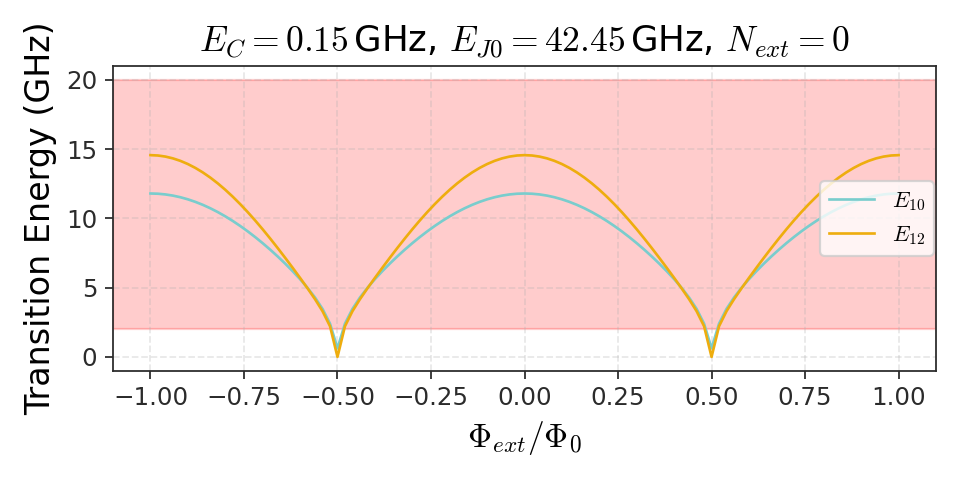

In [4]:
# Geometrical Parameters
# Distances will be in µm
L_gate = 30
C_gate = (L_gate / 10) * fF

L_transmon = 350
S_transmon = 24
C_transmon = (4 * (L_transmon - 2 * S_transmon) / 10) * fF

no_100x100_jj_squares = 1

QUBIT_PARAMETERS = {
    "C_gate": C_gate,
    "C_transmon": C_transmon,
    "jj_squares": no_100x100_jj_squares,
    "number_of_charge_states": 11,
}
transmon_qubit = QuantumBuilder.build_transmon_qubit(
    QUBIT_PARAMETERS, logging_level=logging.INFO,
)

N_ext_list = [0]
flux_ext_list = np.linspace(-1, 1, 101)
simulation = transmon_qubit.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list, 
    flux_ext_list=flux_ext_list,
    number_of_levels_to_simulate=3, 
    use_sparse_matrix=False)

# Plot simulation and spectrum
fig, ax = plt.subplots(1, 1, figsize=(6, 3), sharex=True)
transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]

ax.plot(flux_ext_list, transition01,
           linestyle="-",
           color=COLORMAP_01[0],
           label="$E_{10}$"
          )
ax.plot(flux_ext_list, transition12,
           linestyle="-",
           color=COLORMAP_01[1],
           label="$E_{12}$"
          )

ax.set_title(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}\,$GHz, $E_{{J0}}={transmon_qubit.transmon_qubit_constant_manager.EJ0:.2f}\,$GHz, $N_{{ext}}={N_ext_list[0]}$", fontsize=16)
ax.set_ylabel("Transition Energy (GHz)", fontsize=15)
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.legend(loc="center right",
           borderaxespad=0.1)
ax.axhspan(2, 20, color='red', alpha=0.2)

plt.tight_layout()

# Simulation different charge states 
- 1st dimesion of output is $N_\text{ext}$
- 2nd dimension out ouput is $\Phi_\text{ext}$
- 3rd dimension is the ith energy level or eigenvector

In [12]:
QUBIT_PARAMETERS = {
    "C_gate": 1 * fF,
    "C_transmon": 1 * fF,
    "jj_squares": 1,
    "number_of_charge_states": 11,
}
transmon_qubit = QuantumBuilder.build_transmon_qubit(
    QUBIT_PARAMETERS, logging_level=logging.INFO,
)

N_ext_list = np.linspace(-2.5, 2.5, 201)
flux_ext_list = [0]
number_of_levels_to_simulate = 3
use_sparse_matrix = False

EC = 17.5
EJ0 = 10
transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)
simulation = transmon_qubit.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list, 
    flux_ext_list=flux_ext_list, 
    number_of_levels_to_simulate=number_of_levels_to_simulate, 
    use_sparse_matrix=use_sparse_matrix)

EC = 70
EJ0 = 0.4
transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)
simulation_2 = transmon_qubit.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list, 
    flux_ext_list=flux_ext_list, 
    number_of_levels_to_simulate=number_of_levels_to_simulate, 
    use_sparse_matrix=use_sparse_matrix)

transmon_qubit_constant_manager:129:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

-----Energies-----
EC:                                               6.39 (GHz)
EJ0:                                              82.36 (GHz)

-----Raw Parameters-----
number_of_charge_states:                          11
jj_squares:                                       1
C_transmon:                                       1.00 (fF)
C_gate:                                           1.00 (fF)

-----Derived Parameters-----
C_jj:                                             0.51 (fF)
C_𝛴 = C_transmon + C_gate + 2 * C_jj:             3.02 (fF)
Critical Current:                                 0.17 (µA)
JJ Resistance:                                    1.84 (k𝛀)


transmon_qubit_constant_manager:118:override_parameters
⮑  Overriding to the following values:
EC:       17.5
EJ0:      10


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_s

<IPython.core.display.Javascript object>


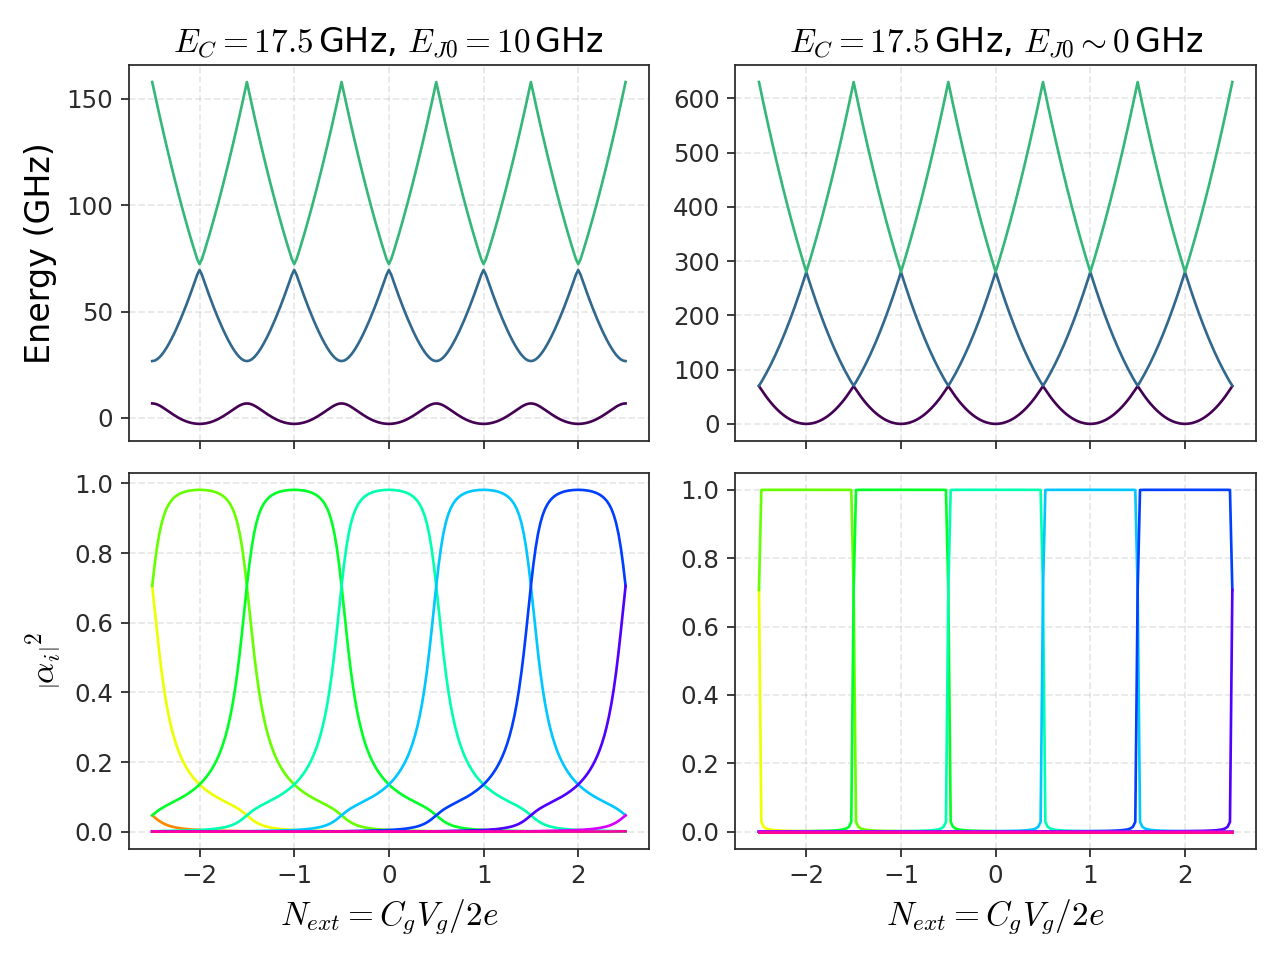

In [14]:
%matplotlib notebook

# 1 - plot simulation and spectrum
fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True)

for level in range(number_of_levels_to_simulate):
    ax[0][0].plot(N_ext_list, simulation["eigvals"][:,0,level],
        color=COLORMAP_ENERGY(level / number_of_levels_to_simulate),
        linestyle="-")
for charge_state in range(QUBIT_PARAMETERS["number_of_charge_states"]):
    ax[1][0].plot(N_ext_list, np.abs(simulation["eigvecs"][:, 0, 0, charge_state]),
        color=COLORMAP_STATE(charge_state / QUBIT_PARAMETERS["number_of_charge_states"]),
        linestyle="-")
    
for level in range(number_of_levels_to_simulate):
    ax[0][1].plot(N_ext_list, simulation_2["eigvals"][:,0,level],
        color=COLORMAP_ENERGY(level / number_of_levels_to_simulate),
        linestyle="-")
for charge_state in range(QUBIT_PARAMETERS["number_of_charge_states"]):
    ax[1][1].plot(N_ext_list, np.abs(simulation_2["eigvecs"][:, 0, 0, charge_state]),
        color=COLORMAP_STATE(charge_state / QUBIT_PARAMETERS["number_of_charge_states"]),
        linestyle="-")

ax[0][0].set_title("$E_C=17.5\,$GHz, $E_{J0}=10\,$GHz", fontsize=15)
ax[0][0].set_ylabel("Energy (GHz)", fontsize=15)
ax[1][0].set_ylabel(r"$\left|\alpha_i\right|^2$", fontsize=15)    
ax[1][0].set_xlabel("$N_{ext} = C_gV_g/2e$", fontsize=15)
ax[0][1].set_title("$E_C=17.5\,$GHz, $E_{J0}\sim 0\,$GHz", fontsize=15)
ax[1][1].set_xlabel("$N_{ext} = C_gV_g/2e$", fontsize=15)
plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/cooper-pair-box-as-a-function-of-next.pdf")

## 3D

transmon_qubit_constant_manager:118:override_parameters
⮑  Overriding to the following values:
EC:       70
EJ0:      10


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


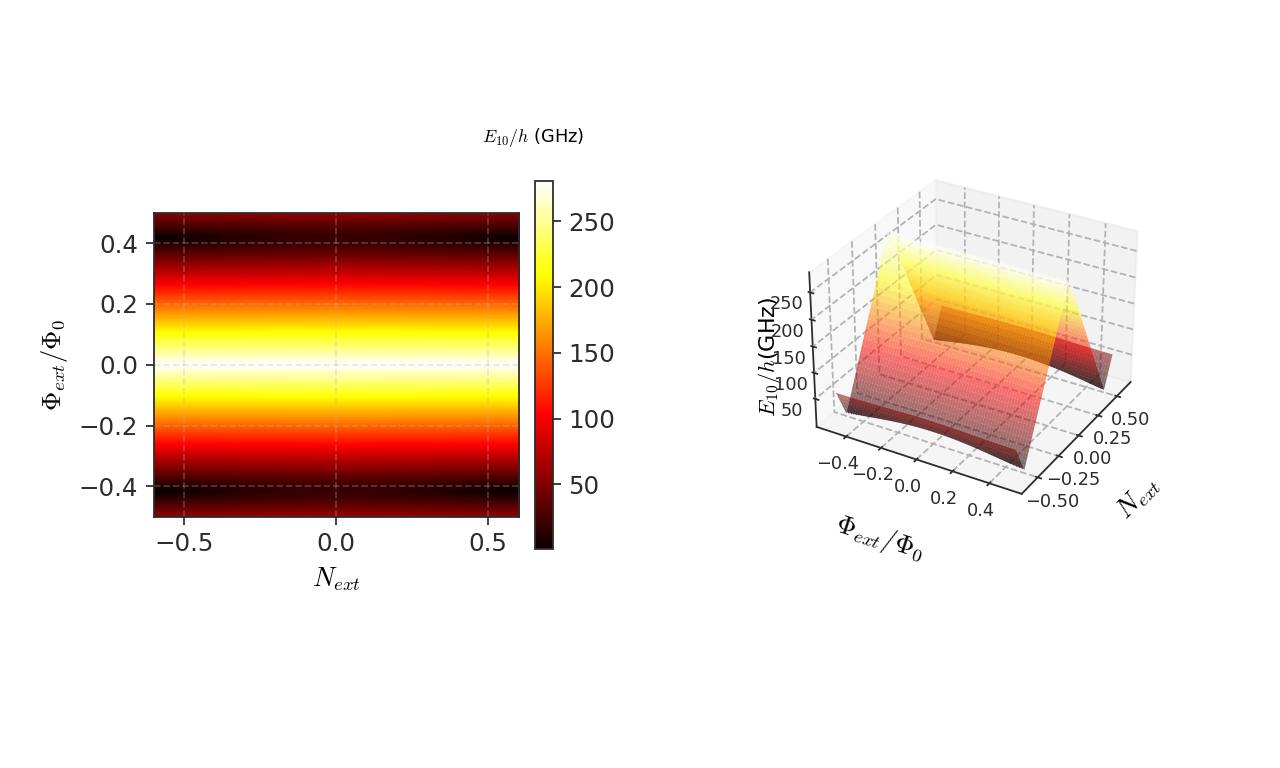

Text(10500, 0, '$E_{10}/h$(GHz)')

In [15]:
EC = 70
EJ0 = 10
transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)
N_ext_list = np.linspace(-0.6, 0.6, 201)
flux_ext_list = np.linspace(-0.5, 0.5, 201)
number_of_levels_to_simulate = 3
use_sparse_matrix = False

simulation = transmon_qubit.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list, 
    flux_ext_list=flux_ext_list, 
    number_of_levels_to_simulate=number_of_levels_to_simulate, 
    use_sparse_matrix=use_sparse_matrix)

transition_01 = simulation["eigvals"][:,:,1] - simulation["eigvals"][:,:,0]

fig = plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.12, bottom=None, right=0.9,
                     top=None, wspace=0.5, hspace=1)

ax_2d = fig.add_subplot(1, 2, 1)
im = ax_2d.imshow(
    transition_01,
    extent=[min(N_ext_list), max(N_ext_list), min(flux_ext_list), max(flux_ext_list)],
    origin='lower',
    cmap=cm.hot,
    interpolation='bessel',
)
# Annotation
cb = fig.colorbar(im, ax=ax_2d, fraction=0.046, pad=0.04)
cb.ax.set_ylabel(r"$E_{10}/h$ (GHz)", fontsize=8,
                 rotation=0, ha="left", labelpad=-60, y=1.15)
ax_2d.set_ylabel(r"$\Phi_{ext}/\Phi_0$", fontsize=12)
ax_2d.set_xlabel(r"$N_{ext}$", fontsize=12)

(x0, y0, width, height) = ax_2d.get_position().bounds
(w_pad, h_pad, wspace, hspace) = fig.get_constrained_layout_pads()
ax_3d = fig.add_axes([x0 + width + 7 * hspace, y0, width * 1.5, height * 1.2], projection='3d')
ax_3d.zaxis._axinfo['juggled'] = (1,2,1)

grid_x, grid_y = np.meshgrid(flux_ext_list, N_ext_list)
surf = ax_3d.plot_surface(grid_x, grid_y,
                          transition_01,
                          cmap=cm.hot,
                          ccount=100,
                          rcount=100,
                          alpha=0.55,
                          linewidth=0, antialiased=True, edgecolor='red'
                          )

# Annotation
# ax_3d.view_init(elev=32, azim=32)
ax_3d.set_xlabel(r"$\Phi_{ext}/\Phi_0$", fontsize=12)
ax_3d.set_ylabel(r"$N_{ext}$", fontsize=12)
ax_3d.tick_params(axis='both', which='major', labelsize=8, pad=-2)
ax_3d.zaxis.set_rotate_label(False)
ax_3d.set_zlabel(r"$E_{10}/h$(GHz)", fontsize=10, rotation=90, labelpad=-10, x=10500)
# ax_3d.text(x0, y0 - width * 0.5, 55, r"$E_{10}/h$ (GHz)", color='black',fontsize=8)

# ax_3d.invert_xaxis()

## $\Phi_{ext}$  varied and $N_{ext}=0$

In [16]:
N_ext_list = [0.5]
flux_ext_list = np.linspace(-1.5, 1.5, 201)
number_of_levels_to_simulate = 2
use_sparse_matrix = False

EC = 70
EJ0 = 10
transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)

simulation_1 = transmon_qubit.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list, 
    flux_ext_list=flux_ext_list, 
    number_of_levels_to_simulate=number_of_levels_to_simulate, 
    use_sparse_matrix=use_sparse_matrix)

transmon_qubit_constant_manager:118:override_parameters
⮑  Overriding to the following values:
EC:       70
EJ0:      10


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



In [17]:
EC = 17.5
EJ0 = 10
N_ext_list = [0]
transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)

simulation_2 = transmon_qubit.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list, 
    flux_ext_list=flux_ext_list, 
    number_of_levels_to_simulate=number_of_levels_to_simulate, 
    use_sparse_matrix=use_sparse_matrix)

transmon_qubit_constant_manager:118:override_parameters
⮑  Overriding to the following values:
EC:       17.5
EJ0:      10


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


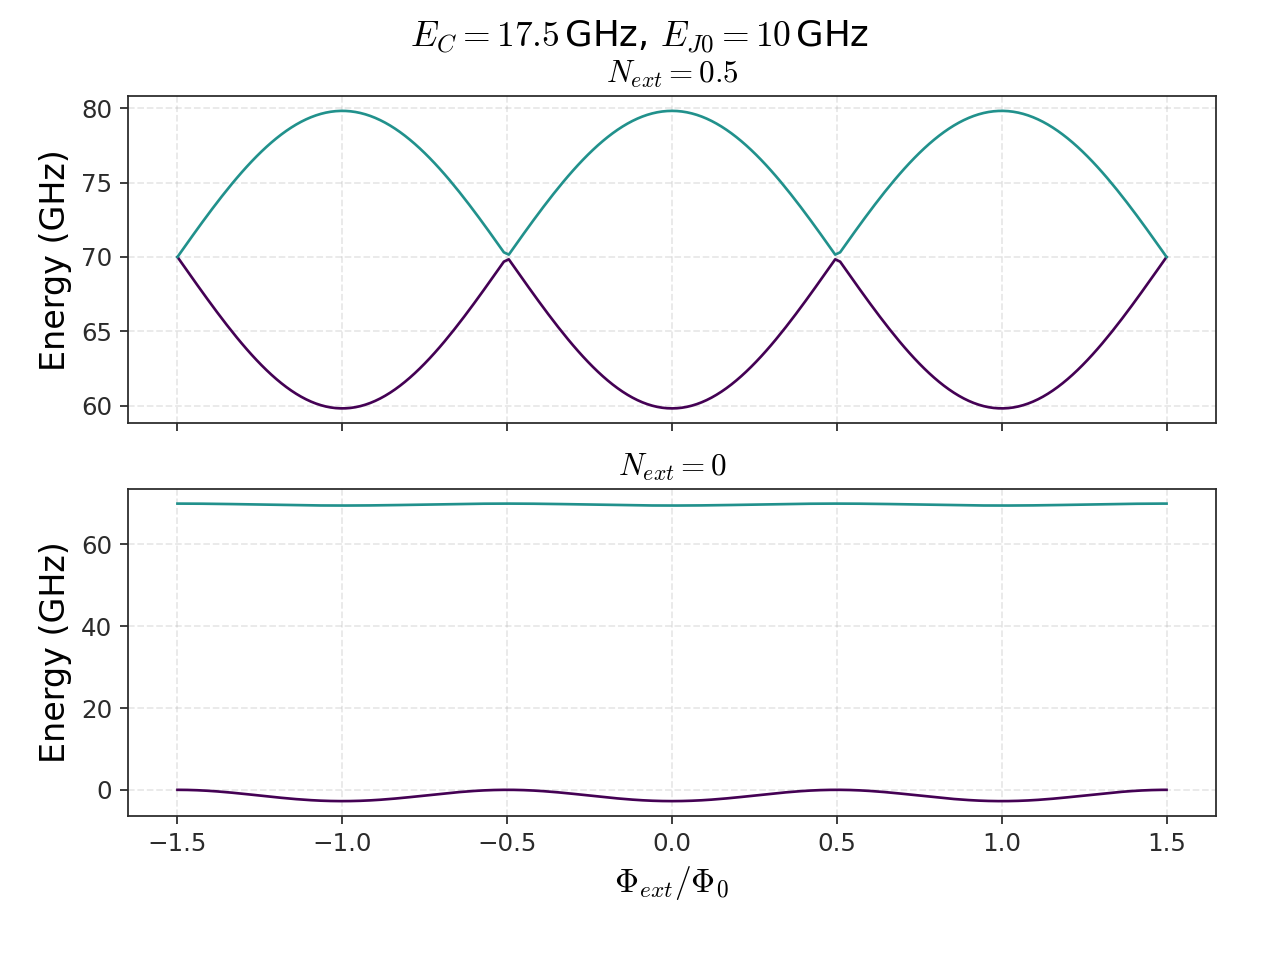

In [22]:
%matplotlib notebook

# 1 - plot simulation and spectrum
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

for level in range(number_of_levels_to_simulate):
    ax[0].plot(flux_ext_list, simulation_1["eigvals"][0,:,level],
        color=COLORMAP_ENERGY(level / number_of_levels_to_simulate),
        linestyle="-")
    
for level in range(number_of_levels_to_simulate):
    ax[1].plot(flux_ext_list, simulation_2["eigvals"][0,:,level],
        color=COLORMAP_ENERGY(level / number_of_levels_to_simulate),
        linestyle="-")

fig.suptitle(f"$E_C={EC}\,$GHz, $E_{{J0}}=10\,$GHz", fontsize=16)
ax[0].set_title("$N_{ext}=0.5$", fontsize=14)
ax[1].set_title("$N_{ext}=0$", fontsize=14)
ax[0].set_ylabel("Energy (GHz)", fontsize=15)
ax[1].set_ylabel("Energy (GHz)", fontsize=15)
ax[1].set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/cooper-pair-box-as-a-function-of-phi-ext.pdf")

# Investigating different simulation regimes

## Low anharmonicity

transmon_qubit_constant_manager:129:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

-----Energies-----
EC:                                               0.33 (GHz)
EJ0:                                              82.36 (GHz)

-----Raw Parameters-----
number_of_charge_states:                          20
jj_squares:                                       1
C_transmon:                                       56.00 (fF)
C_gate:                                           1.50 (fF)

-----Derived Parameters-----
C_jj:                                             0.51 (fF)
C_𝛴 = C_transmon + C_gate + 2 * C_jj:             58.52 (fF)
Critical Current:                                 0.17 (µA)
JJ Resistance:                                    1.84 (k𝛀)


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


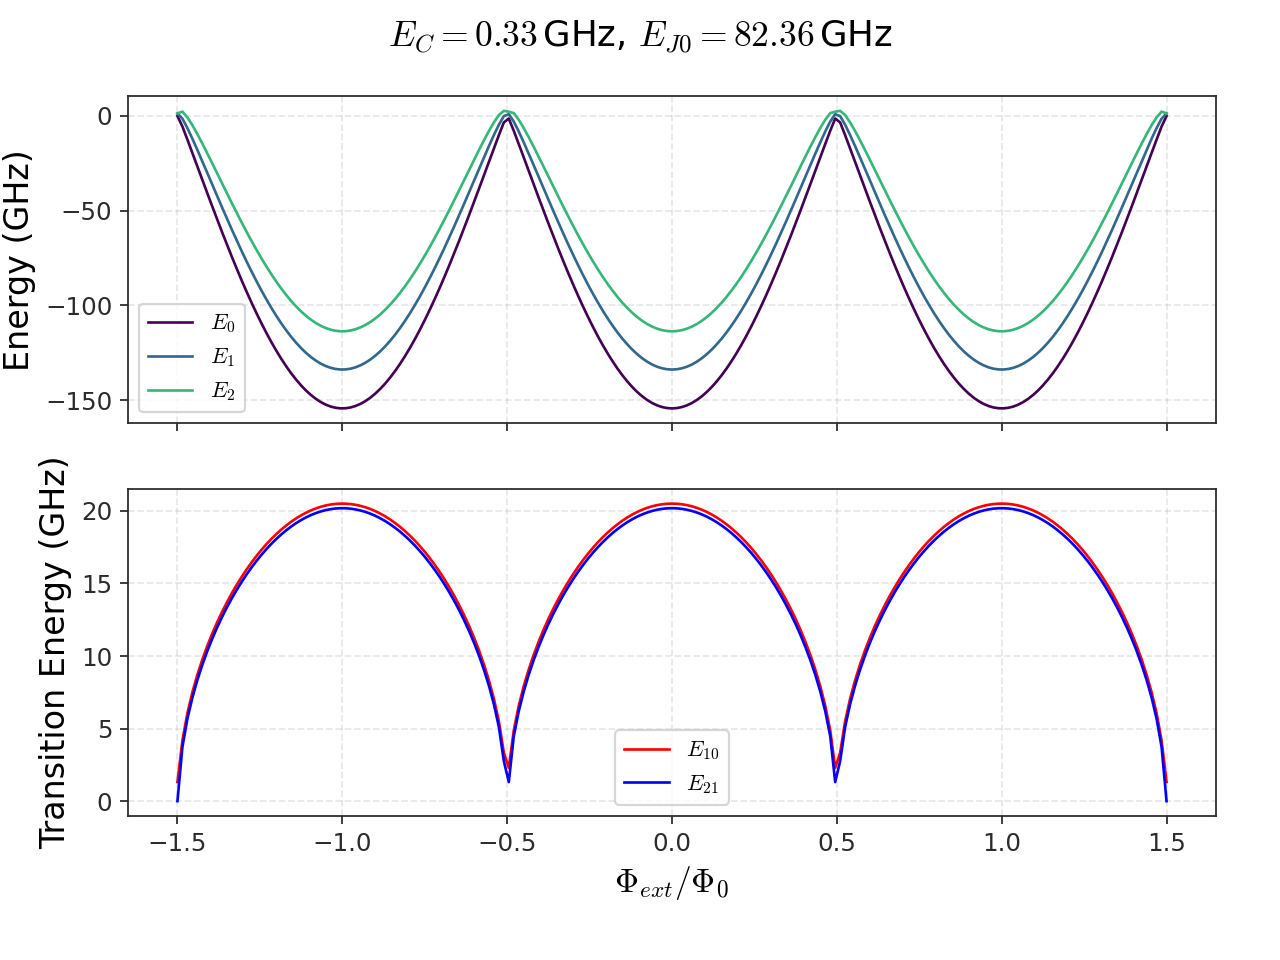

In [23]:
import logging
import numpy as np
from quantum_builder import QuantumBuilder

# Distances will be in µm
L_gate = 15
C_gate = (L_gate / 10) * fF

L_transmon = 150
S_transmon = 10
C_transmon = (4 * (L_transmon - S_transmon) / 10) * fF

QUBIT_PARAMETERS = {
    "C_gate": C_gate,
    "C_transmon": C_transmon,
    "jj_squares": 1,
    "number_of_charge_states": 20,
}
transmon_qubit = QuantumBuilder.build_transmon_qubit(
    QUBIT_PARAMETERS, logging_level=logging.INFO,
)

# Simulation
N_ext_list = [0]
flux_ext_list = np.linspace(-1.5, 1.5, 201)
number_of_levels_to_simulate = 3
use_sparse_matrix = False

simulation = transmon_qubit.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list, 
    flux_ext_list=flux_ext_list, 
    number_of_levels_to_simulate=number_of_levels_to_simulate, 
    use_sparse_matrix=use_sparse_matrix)

# Plot simulation and spectrum
transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

for level in range(number_of_levels_to_simulate):
    ax[0].plot(flux_ext_list, simulation["eigvals"][0,:,level],
        color=COLORMAP_ENERGY(level / number_of_levels_to_simulate),
        linestyle="-", label=f"$E_{level}$")
    
ax[1].plot(flux_ext_list, transition01,
           color="red",
           linestyle="-",
           label="$E_{10}$"
          )
ax[1].plot(flux_ext_list, transition12,
           color="blue",
           linestyle="-",
           label="$E_{21}$"
          )

fig.suptitle(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}\,$GHz, $E_{{J0}}={transmon_qubit.transmon_qubit_constant_manager.EJ0:.2f}\,$GHz", fontsize=16)
ax[0].set_ylabel("Energy (GHz)", fontsize=15)
ax[0].legend()
ax[1].set_ylabel("Transition Energy (GHz)", fontsize=15)
ax[1].set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax[1].legend()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/transmon-low-anharmonicity.pdf")

## High anharmonicity

transmon_qubit_constant_manager:129:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

-----Energies-----
EC:                                               1.67 (GHz)
EJ0:                                              164.72 (GHz)

-----Raw Parameters-----
number_of_charge_states:                          15
jj_squares:                                       2
C_transmon:                                       8.00 (fF)
C_gate:                                           1.50 (fF)

-----Derived Parameters-----
C_jj:                                             1.02 (fF)
C_𝛴 = C_transmon + C_gate + 2 * C_jj:             11.54 (fF)
Critical Current:                                 0.33 (µA)
JJ Resistance:                                    0.92 (k𝛀)


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


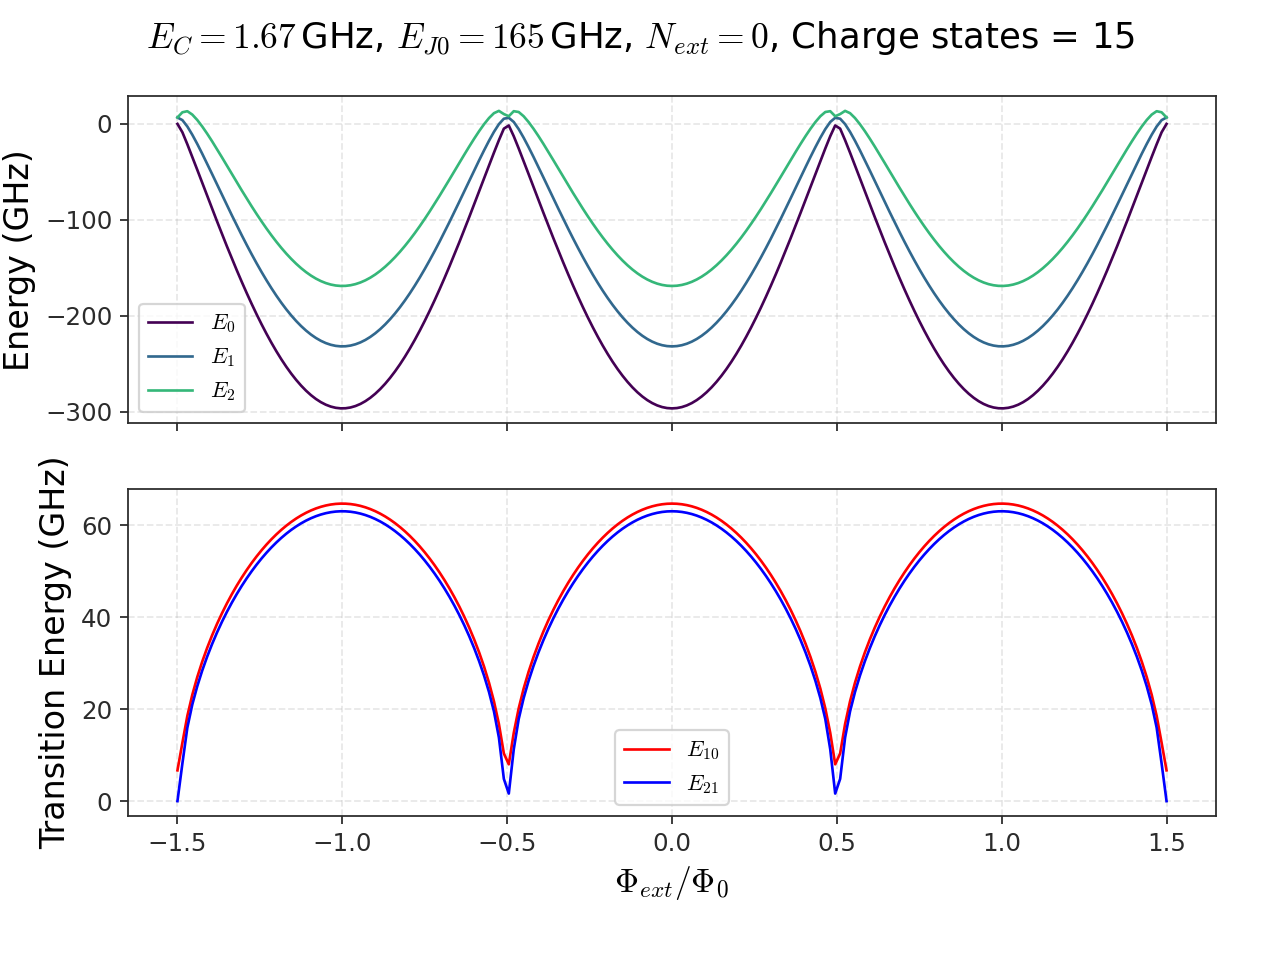

In [24]:
# Parameters
# Distances will be in µm
L_gate = 15
C_gate = (L_gate / 10) * fF

L_transmon = 30
S_transmon = 10
C_transmon = (4 * (L_transmon - S_transmon) / 10) * fF

N_ext_list = [0]
flux_ext_list = np.linspace(-1.5, 1.5, 201)
number_of_levels_to_simulate = 3
use_sparse_matrix = False
number_of_charge_states = 15

QUBIT_PARAMETERS = {
    "C_gate": C_gate,
    "C_transmon": C_transmon,
    "jj_squares": 2,
    "number_of_charge_states": number_of_charge_states,
}


# Simulation
transmon_qubit = QuantumBuilder.build_transmon_qubit(
    QUBIT_PARAMETERS, logging_level=logging.INFO,
)
simulation = transmon_qubit.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list, 
    flux_ext_list=flux_ext_list, 
    number_of_levels_to_simulate=number_of_levels_to_simulate, 
    use_sparse_matrix=use_sparse_matrix)

# Plot simulation and spectrum
transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

for level in range(number_of_levels_to_simulate):
    ax[0].plot(flux_ext_list, simulation["eigvals"][0,:,level],
        color=COLORMAP_ENERGY(level / number_of_levels_to_simulate),
        linestyle="-", label=f"$E_{level}$")
ax[1].plot(flux_ext_list, transition01,
           color="red",
           linestyle="-",
           label="$E_{10}$"
          )
ax[1].plot(flux_ext_list, transition12,
           color="blue",
           linestyle="-",
           label="$E_{21}$"
          )

fig.suptitle(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}\,$GHz, $E_{{J0}}={transmon_qubit.transmon_qubit_constant_manager.EJ0:.0f}\,$GHz, $N_{{ext}} = {N_ext_list[0]}$, Charge states = {number_of_charge_states}", fontsize=16)
ax[0].set_ylabel("Energy (GHz)", fontsize=15)
ax[0].legend()
ax[1].set_ylabel("Transition Energy (GHz)", fontsize=15)
ax[1].set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax[1].legend()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/transmon-with-parameters-from-geometry.pdf")

## Vary $N_{ext}$
Repeat simulations but for different $N_{ext}$ values

<IPython.core.display.Javascript object>


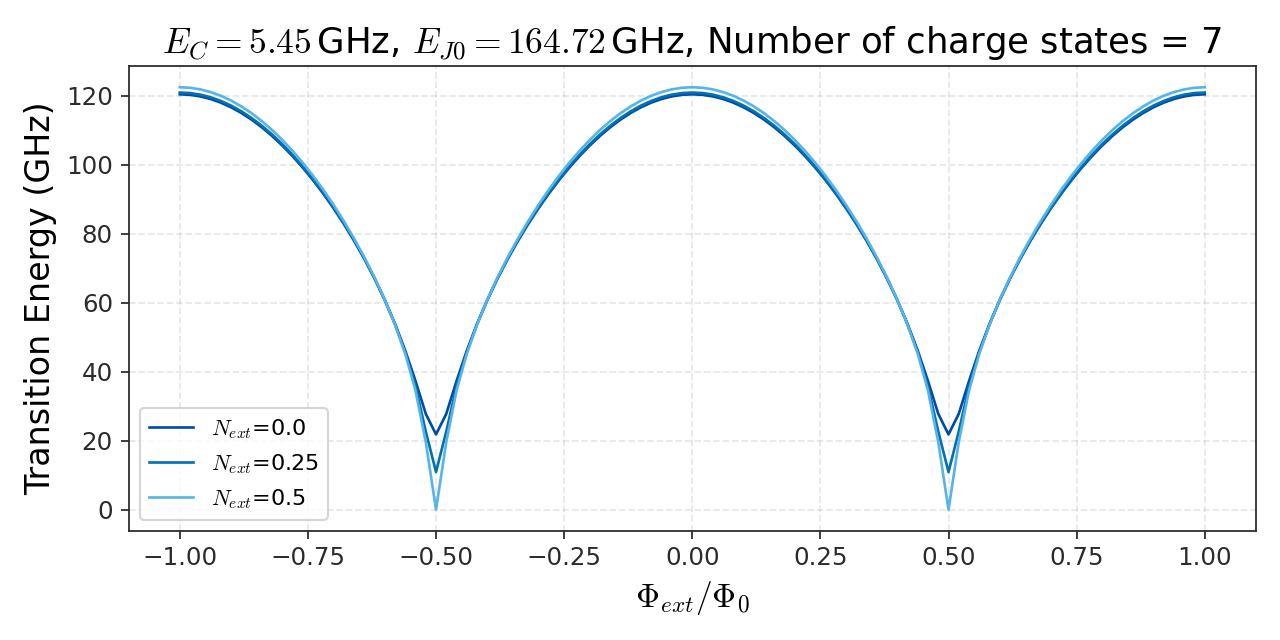

In [25]:
# Parameters
# Distances will be in µm
L_gate = 15
C_gate = (L_gate / 10) * fF

L_transmon = 10
S_transmon = 10
C_transmon = (4 * (L_transmon - S_transmon) / 10) * fF

N_ext_list = [0]
flux_ext_list = np.linspace(-1, 1, 101)
use_sparse_matrix = False
number_of_levels_to_simulate = 3
number_of_charge_states = 7

fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
for N_ext in np.linspace(0, 0.5, 3):
    N_ext_list = [N_ext]
    
    QUBIT_PARAMETERS = {
        "C_gate": C_gate,
        "C_transmon": C_transmon,
        "jj_squares": 2,
        "number_of_charge_states": number_of_charge_states,
    }
    # Simulation
    transmon_qubit = QuantumBuilder.build_transmon_qubit(
        QUBIT_PARAMETERS, logging_level=logging.ERROR,
    )
    simulation = transmon_qubit.transmon_qubit_simulator.simulate(
        N_ext_list=N_ext_list, 
        flux_ext_list=flux_ext_list, 
        number_of_levels_to_simulate=number_of_levels_to_simulate, 
        use_sparse_matrix=use_sparse_matrix)

    # Plot simulation and spectrum
    transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
    ax.plot(flux_ext_list, transition01,
               linestyle="-",
                label=f"$N_{{ext}}$={N_ext}"
              )

    
ax.set_title(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}\,$GHz, $E_{{J0}}={transmon_qubit.transmon_qubit_constant_manager.EJ0:.2f}\,$GHz, Number of charge states = {number_of_charge_states}", fontsize=16)
ax.set_ylabel("Transition Energy (GHz)", fontsize=15)
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.legend()
plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/transmon-sweep-N_ext.pdf")
plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/transmon-sweep-N_ext.png")

## Vary number of simulated states
- Let us investigate the effect of simulation with different number of states

**It seems that more states begins to converge on the correct answer, however more states will also tend to remove the anharmonicty of transitions**

<IPython.core.display.Javascript object>


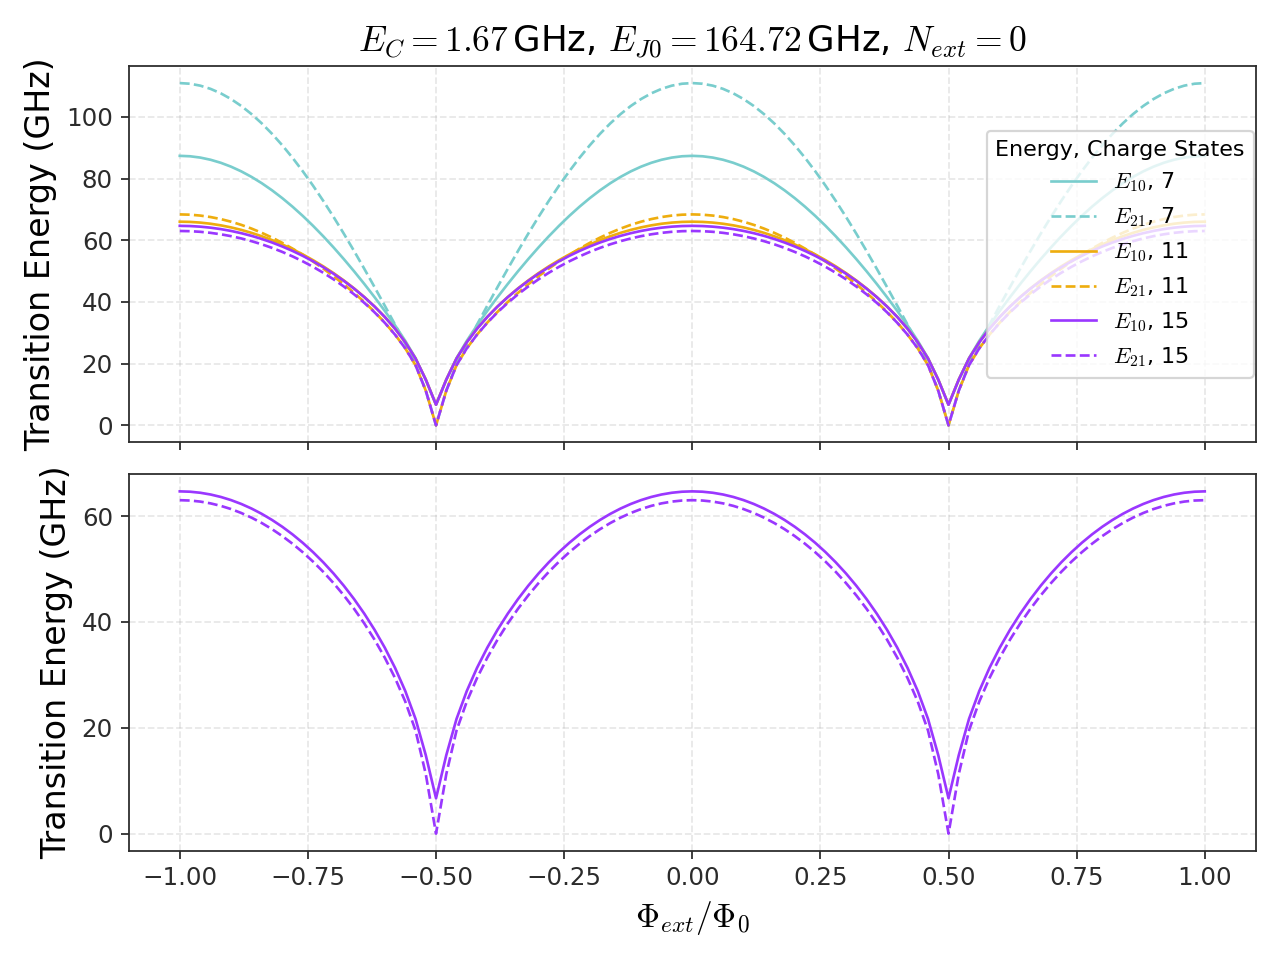

In [26]:
COLORMAP_01 = ["#79cdcd", "#eead0e", "#9a37ff", "#00ee76"]
COLORMAP_12 = plt.get_cmap('Reds')

# Parameters
# Distances will be in µm
L_gate = 15
C_gate = (L_gate / 10) * fF

L_transmon = 30
S_transmon = 10
C_transmon = (4 * (L_transmon - S_transmon) / 10) * fF

N_ext_list = [0]
flux_ext_list = np.linspace(-1, 1, 101)
use_sparse_matrix = False
number_of_levels_to_simulate = 3
number_of_charge_states_list = [7, 11, 15]

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
for (idx, number_of_charge_states) in enumerate(number_of_charge_states_list):
    
    QUBIT_PARAMETERS = {
        "C_gate": C_gate,
        "C_transmon": C_transmon,
        "jj_squares": 2,
        "number_of_charge_states": number_of_charge_states,
    }
    # Simulation
    transmon_qubit = QuantumBuilder.build_transmon_qubit(
        QUBIT_PARAMETERS, logging_level=logging.ERROR,
    )
    simulation = transmon_qubit.transmon_qubit_simulator.simulate(
        N_ext_list=N_ext_list, 
        flux_ext_list=flux_ext_list, 
        number_of_levels_to_simulate=number_of_levels_to_simulate, 
        use_sparse_matrix=use_sparse_matrix)

    # Plot simulation and spectrum
    transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
    transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]
    
    ax[0].plot(flux_ext_list, transition01,
               linestyle="-",
               color=COLORMAP_01[idx],
                label=f"$E_{{10}}$, {number_of_charge_states}"
              )
    ax[0].plot(flux_ext_list, transition12,
               linestyle="--",
               color=COLORMAP_01[idx],
                label=f"$E_{{21}}$, {number_of_charge_states}"
              )
    
    if idx == (len(number_of_charge_states_list) - 1):
        ax[1].plot(flux_ext_list, transition01,
               linestyle="-",
               color=COLORMAP_01[idx],
                label=f"$E_{{10}}$, {number_of_charge_states}"
              )
        ax[1].plot(flux_ext_list, transition12,
                   linestyle="--",
                   color=COLORMAP_01[idx],
                    label=f"$E_{{21}}$, {number_of_charge_states}"
                  )

ax[0].set_title(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}\,$GHz, $E_{{J0}}={transmon_qubit.transmon_qubit_constant_manager.EJ0:.2f}\,$GHz, $N_{{ext}}={N_ext_list[0]}$", fontsize=16)
ax[0].set_ylabel("Transition Energy (GHz)", fontsize=15)
ax[1].set_ylabel("Transition Energy (GHz)", fontsize=15)
ax[1].set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax[0].legend(loc="center right",
           borderaxespad=0.1,
          title="Energy, Charge States")

plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/transmon-sweep-number-of-charge-states.pdf")

# Digging for anharmonicity and charge dispersion
- We want to probe how the ratio $E_C/E_{J0}$ affects the transitions energy ratio
\begin{equation}
 \alpha = \frac{E_{21} - E_{10}}{E_{10}}.
\end{equation}

- We also want to look at charge dispersion

\begin{equation}
 \varepsilon_m = \frac{E_m(N_{ext}=0.5) - E_m(N_{ext}=0)}{E_{10}}
\end{equation}

transmon_qubit_constant_manager:129:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

-----Energies-----
EC:                                               9.55 (GHz)
EJ0:                                              82.36 (GHz)

-----Raw Parameters-----
number_of_charge_states:                          15
jj_squares:                                       1
C_transmon:                                       1.00 (fF)
C_gate:                                           0.00 (fF)

-----Derived Parameters-----
C_jj:                                             0.51 (fF)
C_𝛴 = C_transmon + C_gate + 2 * C_jj:             2.02 (fF)
Critical Current:                                 0.17 (µA)
JJ Resistance:                                    1.84 (k𝛀)




<IPython.core.display.Javascript object>


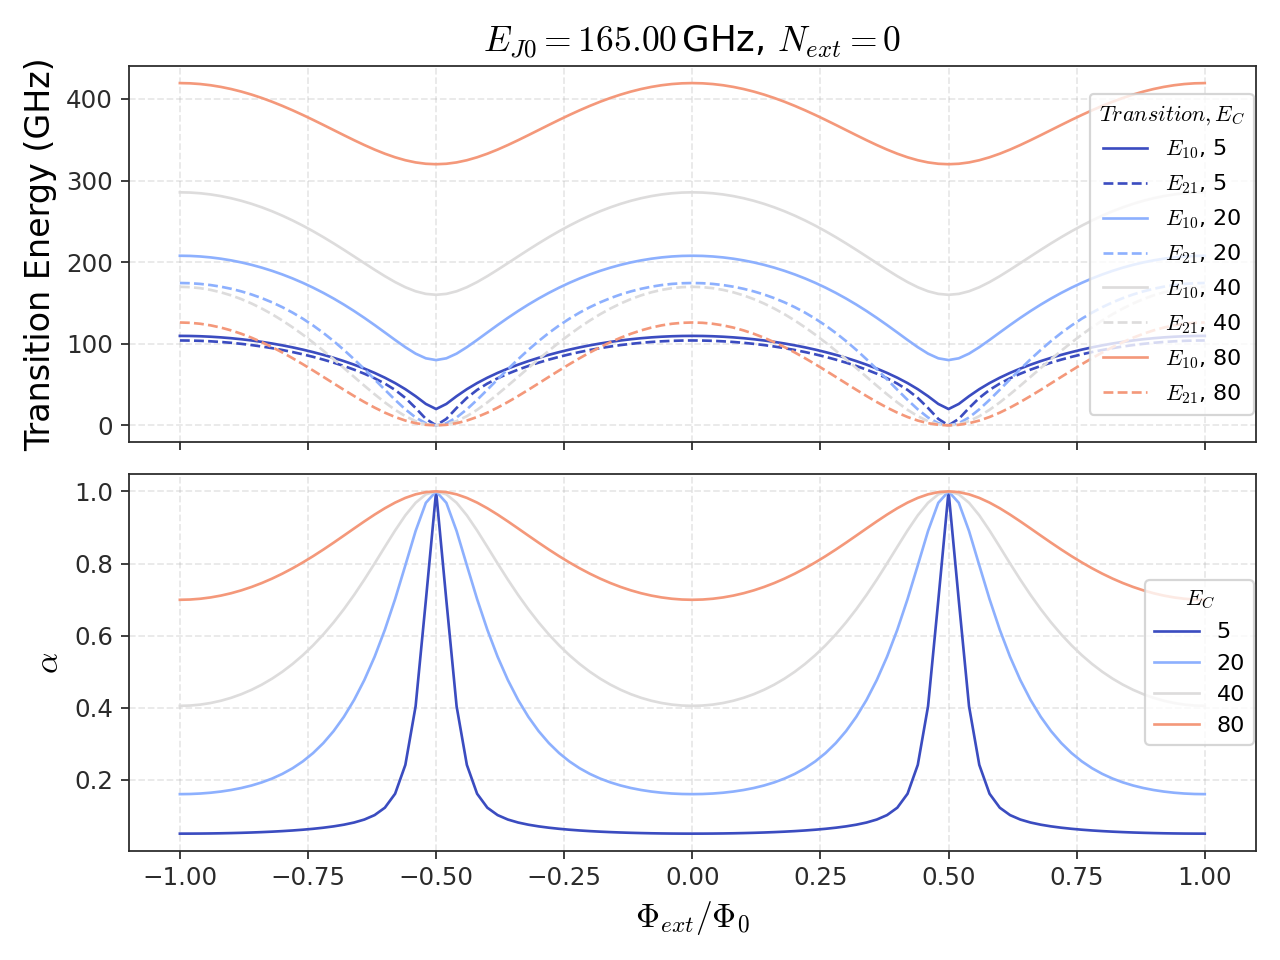

transmon_qubit_constant_manager:118:override_parameters
⮑  Overriding to the following values:
EC:       5
EJ0:      165


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon_qubit_constant_manager:118:override_parameters
⮑  Overriding to the following values:
EC:       20
EJ0:      165


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon_qubit_constant_manager:118:override_parameters
⮑  Overriding to the following values:
EC:       40
EJ0:      165


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon_qubit_constant_manager:118:override_parameters
⮑  Overriding to the following values:
EC:       80
EJ0:      165


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



In [27]:
COLORMAP = plt.get_cmap('coolwarm')
COLORMAP12 = plt.get_cmap('hsv')

N_ext_list = [0.5]
flux_ext_list = np.linspace(-1, 1, 101)
number_of_levels_to_simulate = 3
use_sparse_matrix = False

EC_list = [5, 20, 40, 80]
EJ0 = 165
N_ext_list = [0]

QUBIT_PARAMETERS = {
    "C_gate": 0 * fF,
    "C_transmon": 1 * fF,
    "jj_squares": 1,
    "number_of_charge_states": 15,
}

transmon_qubit = QuantumBuilder.build_transmon_qubit(
    QUBIT_PARAMETERS, logging_level=logging.INFO,
)

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

for idx, EC in enumerate(EC_list):
    transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)

    simulation = transmon_qubit.transmon_qubit_simulator.simulate(
        N_ext_list=N_ext_list, 
        flux_ext_list=flux_ext_list, 
        number_of_levels_to_simulate=number_of_levels_to_simulate, 
        use_sparse_matrix=use_sparse_matrix)
    # Plot simulation and spectrum
    transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
    transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]
    
    ax[0].plot(flux_ext_list, transition01,
               linestyle="-",
               color=COLORMAP(idx / len(EC_list)),
               label=f"$E_{{10}}$, {EC}"
              )
    ax[0].plot(flux_ext_list, transition12,
               linestyle="--",
               color=COLORMAP(idx / len(EC_list)),
               label=f"$E_{{21}}$, {EC}"
              )
    
    ax[1].plot(flux_ext_list, (transition01 - transition12) / transition01,
               linestyle="-",
               color=COLORMAP(idx / len(EC_list)),
                label=EC
              )

ax[0].set_title(f"$E_{{J0}}={transmon_qubit.transmon_qubit_constant_manager.EJ0:.2f}\,$GHz, $N_{{ext}}={N_ext_list[0]}$", fontsize=16)
ax[0].set_ylabel("Transition Energy (GHz)", fontsize=15)
ax[1].set_ylabel(r"$\alpha$", fontsize=15)
ax[1].set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax[0].legend(loc="center right",
           borderaxespad=0.1,
          title="$Transition, E_C$")
ax[1].legend(loc="center right",
           borderaxespad=0.1,
          title="$E_C$")

plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/transmon-anharmonicity.pdf")

## Now ignoring the specrum and just plotting:
\begin{equation}
 \alpha = \frac{E_{21} - E_{10}}{E_{10}}.
\end{equation}

and

\begin{equation}
 \varepsilon_m = \frac{E_m(N_{ext}=0.5) - E_m(N_{ext}=0)}{E_{10}}
\end{equation}

as a function of $E_C/E_{J0}$

<IPython.core.display.Javascript object>


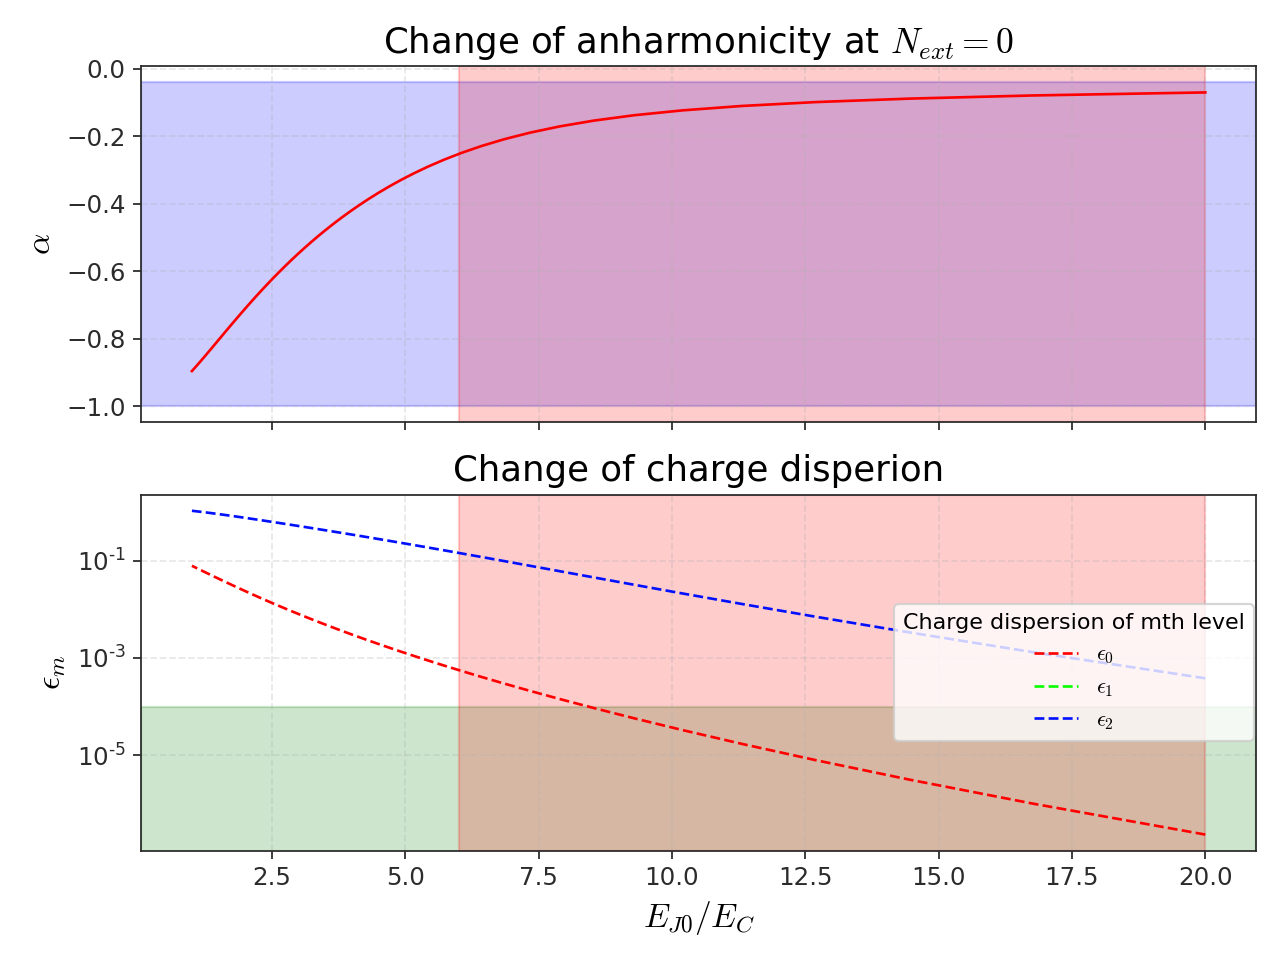

In [28]:
from collections import defaultdict
COLORMAP = plt.get_cmap('hsv')
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Init
N_ext_list = [0, 0.5]
Next0 = 0
Next05 = 1

flux_ext_list = [0]
number_of_levels_to_simulate = 3
use_sparse_matrix = False
EJ0 = 100
QUBIT_PARAMETERS = {
    "C_gate": 0 * fF,
    "C_transmon": 1 * fF,
    "jj_squares": 1,
    "number_of_charge_states": 100,
}
transmon_qubit = QuantumBuilder.build_transmon_qubit(
    QUBIT_PARAMETERS, logging_level=logging.WARNING,
)

# Traverse across EJ0/EC
EC_list = np.linspace(5, 100, 100)
(alpha_list, 
 EJ_EC_ratio_list, 
 charge_dispersion_dict) = ([], 
                            [], 
                            defaultdict(list))

for (idx, EC) in enumerate(EC_list):
    transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)

    simulation = transmon_qubit.transmon_qubit_simulator.simulate(
        N_ext_list=N_ext_list, 
        flux_ext_list=flux_ext_list, 
        number_of_levels_to_simulate=number_of_levels_to_simulate, 
        use_sparse_matrix=use_sparse_matrix)
    
    # Unpack simualation (first index is next, flux_ext, level)
    transition01 = simulation["eigvals"][Next0,0,1] - simulation["eigvals"][Next0,0,0]
    transition12 = simulation["eigvals"][Next0,0,2] - simulation["eigvals"][Next0,0,1]
    
    EJ_EC_ratio_list.append(EJ0 / EC)
    alpha_list.append((transition12 - transition01) / transition01)
    for m in range(number_of_levels_to_simulate):
        charge_dispersion_dict[f"m={m}"].append((simulation["eigvals"][Next05,0,m] - simulation["eigvals"][Next0,0,m]) / transition01)
    
ax[0].plot(EJ_EC_ratio_list, alpha_list,
               linestyle="-",
               color="red",
              )
for idx, m in enumerate(range(number_of_levels_to_simulate)):
    ax[1].plot(EJ_EC_ratio_list, charge_dispersion_dict[f"m={m}"],
           linestyle="--",
           color=COLORMAP(idx / number_of_levels_to_simulate),
           label=f"$\epsilon_{m}$"
          )
    

ax[0].set_title(f"Change of anharmonicity at $N_{{ext}}={N_ext_list[0]}$", fontsize=16)
ax[1].set_title(f"Change of charge disperion", fontsize=16)
ax[0].set_ylabel(r"$\alpha$", fontsize=15)
ax[1].set_ylabel(r"$\epsilon_m$", fontsize=15)
ax[1].set_xlabel("$E_{J0}/E_C$", fontsize=15)
ax[1].legend(loc="center right",
           borderaxespad=0.1,
          title="Charge dispersion of mth level")
ax[1].axhspan(0, 0.0001, color='green', alpha=0.2)
ax[1].set_yscale('log')
ax[0].axhspan(-1, -0.04, color='blue', alpha=0.2)
ax[0].axvspan(6, 20, color='red', alpha=0.2)
ax[1].axvspan(6, 20, color='red', alpha=0.2)
plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/transmon-anharmonicity-and-charge-dispersion.pdf")

# Simulation of suitable parameters
- Maintain  anharmonicity   $|\alpha|  \ge   0.04  $   by  taking $E_{J0}/E_C < 70$;
- Reduce the  charge  dispersion  $\varepsilon_m$ -  practically anything  that  fits  $E_{J0}/E_C  > 5$ will  be  more  than suitable;
- We   need   the   transition  energy   to   be   within   the 5-20 GHz  gap  that  our  laboratory  equipment  can register.

## Geometry for $E_C$

<IPython.core.display.Javascript object>


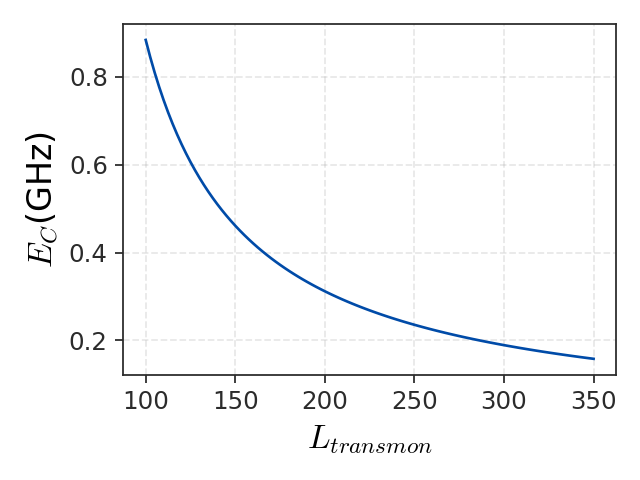

In [10]:
COLORMAP_ENERGY = plt.get_cmap('viridis')
COLORMAP_STATE = plt.get_cmap('hsv')

# Parameters - distances will be in µm
JJ_SQUARES = 1
# Gate - little effect
L_gate = 15
C_gate = (L_gate / 10) * fF

L_transmon_list = np.linspace(100, 350, 101)
EC_list = []
C_tranmson_list = []

for L_transmon in L_transmon_list:
    # Transmon capacitor - do not make it too big
    S_transmon = 24
    C_transmon = (4 * (L_transmon - 2 * S_transmon) / 10) * fF

    number_of_levels_to_simulate=3
    QUBIT_PARAMETERS = {
        "C_gate": 0,
        "C_transmon": C_transmon,
        "jj_squares": JJ_SQUARES,
        "number_of_charge_states": 11,
    }

    # Charge has little effect, so can simulate for 0 or 0.5 - no difference
    N_ext_list = [0, 0.5]
    NUM_FLUX_POINTS = 101
    MID_FLUX_POINT = (NUM_FLUX_POINTS - 1) // 2
    flux_ext_list = np.linspace(-1, 1, NUM_FLUX_POINTS)


    # Simulation
    transmon_qubit = QuantumBuilder.build_transmon_qubit(
        QUBIT_PARAMETERS, logging_level=logging.ERROR,
    )
    
    EC_list.append(transmon_qubit.transmon_qubit_constant_manager.EC)
    C_tranmson_list.append(transmon_qubit.transmon_qubit_constant_manager.C_transmon)
    
fig, ax = plt.subplots(1, 1, figsize=(4, 3), sharex=True)
ax.plot(L_transmon_list, EC_list,
               linestyle="-",
              )    

ax.set_ylabel("$E_C$(GHz)", fontsize=15)
ax.set_xlabel("$L_{transmon}$", fontsize=15)

plt.tight_layout()
plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/EC-selection.pdf")
plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/EC-selection.png")

## Geometry for $E_{J0}$

<IPython.core.display.Javascript object>


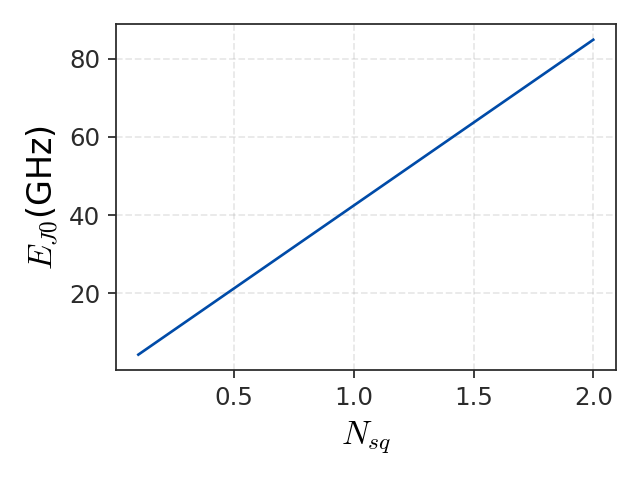

In [13]:
COLORMAP_ENERGY = plt.get_cmap('viridis')
COLORMAP_STATE = plt.get_cmap('hsv')

# Parameters - distances will be in µm
JJ_SQUARES_list = np.linspace(0.1, 2, 11)
# Gate - little effect
L_gate = 15
C_gate = (L_gate / 10) * fF

EJ0_list = []
C_tranmson_list = []

for JJ_SQUARES in JJ_SQUARES_list:
    # Transmon capacitor - do not make it too big
    L_transmon = 100
    S_transmon = 10
    C_transmon = (4 * (L_transmon - 2 * S_transmon) / 10) * fF

    number_of_levels_to_simulate=3
    number_of_charge_states = 40
    QUBIT_PARAMETERS = {
        "C_gate": C_gate,
        "C_transmon": C_transmon,
        "jj_squares": JJ_SQUARES,
        "number_of_charge_states": number_of_charge_states,
    }

    # Charge has little effect, so can simulate for 0 or 0.5 - no difference
    N_ext_list = [0]
    NUM_FLUX_POINTS = 101
    MID_FLUX_POINT = (NUM_FLUX_POINTS - 1) // 2
    flux_ext_list = np.linspace(-1, 1, NUM_FLUX_POINTS)


    # Simulation
    transmon_qubit = QuantumBuilder.build_transmon_qubit(
        QUBIT_PARAMETERS, logging_level=logging.ERROR,
    )
    
    EJ0_list.append(transmon_qubit.transmon_qubit_constant_manager.EJ0)
    
fig, ax = plt.subplots(1, 1, figsize=(4, 3), sharex=True)
ax.plot(JJ_SQUARES_list, EJ0_list,
               linestyle="-",
              )    

ax.set_ylabel("$E_{J0}$(GHz)", fontsize=15)
ax.set_xlabel("$N_{sq}$", fontsize=15)

plt.tight_layout()
plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/EJ0-selection.pdf")
plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/EJ0-selection.png")

## Selecting by fixing transmon size and picking $E_{J0}$
- From above, we will choose $E_C \approx$5GHz (for a decent transmon cross size of 50$\mu m$)

### My old design `tline-9.dwg`
- 150µm Transmon
- JJ 200nm x (200 - 500)nm

<IPython.core.display.Javascript object>


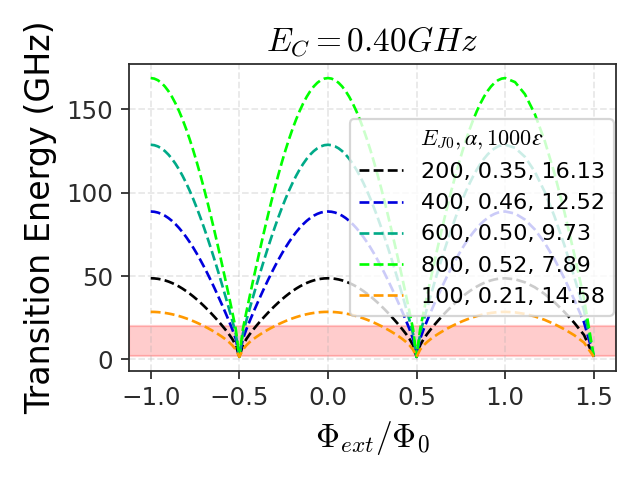

transmon_qubit_constant_manager:121:override_parameters
⮑  Overriding to the following values:
EC:       0.4
EJ0:      200


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon_qubit_constant_manager:121:override_parameters
⮑  Overriding to the following values:
EC:       0.4
EJ0:      400


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon_qubit_constant_manager:121:override_parameters
⮑  Overriding to the following values:
EC:       0.4
EJ0:      600


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon_qubit_constant_manager:121:override_parameters
⮑  Overriding to the following values:
EC:       0.4
EJ0:      800


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation complet

In [7]:
COLORMAP_01 = ["#79cdcd", "#eead0e", "#9a37ff", "#00ee76"]
COLORMAP_12 = plt.get_cmap('nipy_spectral')

QUBIT_PARAMETERS = {
        "C_gate": fF,
        "C_transmon": fF,
        "jj_squares": 1,
        "number_of_charge_states": 11,
    }
EC = 0.4
EJ0_list = [200, 400, 600, 800, 100]
N_ext_list = [0, 1]
NUM_FLUX_POINTS = 101
MID_FLUX_POINT = (NUM_FLUX_POINTS - 1) // 2
flux_ext_list = np.concatenate((np.linspace(-1, 1, NUM_FLUX_POINTS), np.linspace(1, 1.5, 10)))
# np.linspace(-1, 1, NUM_FLUX_POINTS)
number_of_levels_to_simulate = 3


fig, ax = plt.subplots(1, 1, figsize=(4, 3), sharex=True)
for (idx, EJ0) in enumerate(EJ0_list):
    transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)
    simulation = transmon_qubit.transmon_qubit_simulator.simulate(
        N_ext_list=N_ext_list, 
        flux_ext_list=flux_ext_list, 
        number_of_levels_to_simulate=number_of_levels_to_simulate, 
        use_sparse_matrix=False)

    # Plot simulation and spectrum
    transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
    transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]

    alpha =  (transition12[MID_FLUX_POINT] - transition01[MID_FLUX_POINT]) / transition01[MID_FLUX_POINT]
    linestyle="-"
    if (abs(alpha) < 0.04):
        linestyle = "--"
        
    Next05 = 1
    Next0 = 0
    charge_dispersion = (simulation["eigvals"][Next05,MID_FLUX_POINT,0] - simulation["eigvals"][Next0,MID_FLUX_POINT,0]) / transition01[MID_FLUX_POINT]
    if (abs(charge_dispersion) > 10**(-3)):
        linestyle = "--"
    
    ax.plot(flux_ext_list, transition01,
               linestyle=linestyle,
               color=COLORMAP_12(idx / len(EJ0_list)),
                label=f"{EJ0}, {alpha:.2f}, {charge_dispersion * 1000:.2f}"
              )
    
ax.set_title(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}GHz$", fontsize=15)
ax.set_ylabel("Transition Energy (GHz)", fontsize=15)
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.legend(loc="center right",
           borderaxespad=0.1,
          title="$E_{J0},α,1000ɛ$",
#           title_fontsize=20,
#           fontsize=20
         )
ax.axhspan(2, 20, color='red', alpha=0.2)

plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/selecting-EJ0-to-fall-in-range_EC=04GHz.pdf")
plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/selecting-EJ0-to-fall-in-range=04GHz.png")

### $E_C=5.0$ GHz

<IPython.core.display.Javascript object>


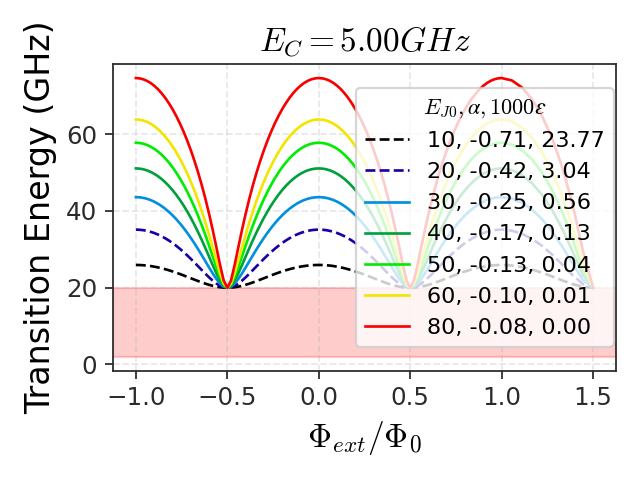

transmon_qubit_constant_manager:121:override_parameters
⮑  Overriding to the following values:
EC:       5
EJ0:      10


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon_qubit_constant_manager:121:override_parameters
⮑  Overriding to the following values:
EC:       5
EJ0:      20


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon_qubit_constant_manager:121:override_parameters
⮑  Overriding to the following values:
EC:       5
EJ0:      30


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon_qubit_constant_manager:121:override_parameters
⮑  Overriding to the following values:
EC:       5
EJ0:      40


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed

transmon

In [8]:
COLORMAP_01 = ["#79cdcd", "#eead0e", "#9a37ff", "#00ee76"]
COLORMAP_12 = plt.get_cmap('nipy_spectral')

QUBIT_PARAMETERS = {
        "C_gate": fF,
        "C_transmon": fF,
        "jj_squares": 1,
        "number_of_charge_states": 11,
    }
EC = 5
EJ0_list = [10, 20, 30, 40, 50, 60, 80]
N_ext_list = [0, 0.5]
NUM_FLUX_POINTS = 101
MID_FLUX_POINT = (NUM_FLUX_POINTS - 1) // 2
flux_ext_list = np.concatenate((np.linspace(-1, 1, NUM_FLUX_POINTS), np.linspace(1, 1.5, 10)))
# np.linspace(-1, 1, NUM_FLUX_POINTS)
number_of_levels_to_simulate = 3


fig, ax = plt.subplots(1, 1, figsize=(4, 3), sharex=True)
for (idx, EJ0) in enumerate(EJ0_list):
    transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)
    simulation = transmon_qubit.transmon_qubit_simulator.simulate(
        N_ext_list=N_ext_list, 
        flux_ext_list=flux_ext_list, 
        number_of_levels_to_simulate=number_of_levels_to_simulate, 
        use_sparse_matrix=False)

    # Plot simulation and spectrum
    transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
    transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]

    alpha =  (transition12[MID_FLUX_POINT] - transition01[MID_FLUX_POINT]) / transition01[MID_FLUX_POINT]
    linestyle="-"
    if (abs(alpha) < 0.04):
        linestyle = "--"
        
    Next05 = 1
    Next0 = 0
    charge_dispersion = (simulation["eigvals"][Next05,MID_FLUX_POINT,0] - simulation["eigvals"][Next0,MID_FLUX_POINT,0]) / transition01[MID_FLUX_POINT]
    if (abs(charge_dispersion) > 10**(-3)):
        linestyle = "--"
    
    ax.plot(flux_ext_list, transition01,
               linestyle=linestyle,
               color=COLORMAP_12(idx / len(EJ0_list)),
                label=f"{EJ0}, {alpha:.2f}, {charge_dispersion * 1000:.2f}"
              )
    
ax.set_title(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}GHz$", fontsize=15)
ax.set_ylabel("Transition Energy (GHz)", fontsize=15)
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.legend(loc="center right",
           borderaxespad=0.1,
          title="$E_{J0},α,1000ɛ$",
#           title_fontsize=20,
#           fontsize=20
         )
ax.axhspan(2, 20, color='red', alpha=0.2)

plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/selecting-EJ0-to-fall-in-range_EC=5GHz.pdf")
plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/selecting-EJ0-to-fall-in-range=5GHz.png")

### $E_C=2.0$ GHz

<IPython.core.display.Javascript object>


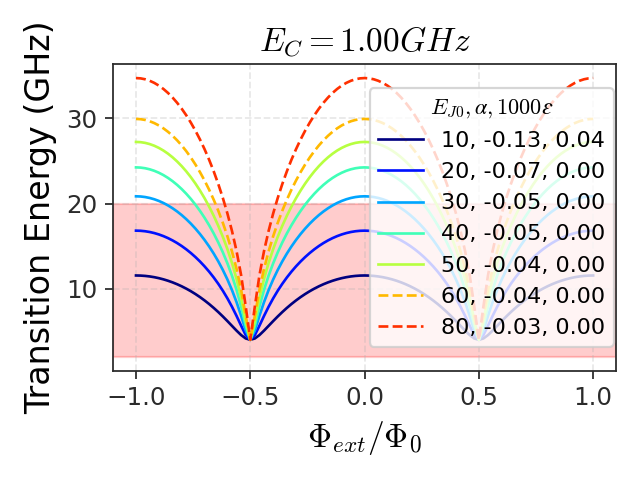

In [5]:
COLORMAP_01 = ["#79cdcd", "#eead0e", "#9a37ff", "#00ee76"]
COLORMAP_12 = plt.get_cmap('jet')

QUBIT_PARAMETERS = {
        "C_gate": fF,
        "C_transmon": fF,
        "jj_squares": 1,
        "number_of_charge_states": 3,
    }
EC = 1
EJ0_list = [10, 20, 30, 40, 50, 60, 80]
N_ext_list = [0, 0.5]
NUM_FLUX_POINTS = 101
MID_FLUX_POINT = (NUM_FLUX_POINTS - 1) // 2
flux_ext_list = np.linspace(-1, 1, NUM_FLUX_POINTS)
number_of_levels_to_simulate = 3


fig, ax = plt.subplots(1, 1, figsize=(4, 3), sharex=True)
for (idx, EJ0) in enumerate(EJ0_list):
    transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)
    simulation = transmon_qubit.transmon_qubit_simulator.simulate(
        N_ext_list=N_ext_list, 
        flux_ext_list=flux_ext_list, 
        number_of_levels_to_simulate=number_of_levels_to_simulate, 
        use_sparse_matrix=False)

    # Plot simulation and spectrum
    transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
    transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]

    alpha =  (transition12[MID_FLUX_POINT] - transition01[MID_FLUX_POINT]) / transition01[MID_FLUX_POINT]
    linestyle="-"
    if (abs(alpha) < 0.04):
        linestyle = "--"
    
    Next05 = 1
    Next0 = 0
    charge_dispersion = (simulation["eigvals"][Next05,MID_FLUX_POINT,0] - simulation["eigvals"][Next0,MID_FLUX_POINT,0]) / transition01[MID_FLUX_POINT]
    if (abs(charge_dispersion) > 10**(-3)):
        linestyle = "--"
    
    ax.plot(flux_ext_list, transition01,
               linestyle=linestyle,
               color=COLORMAP_12(idx / len(EJ0_list)),
                label=f"{EJ0}, {alpha:.2f}, {charge_dispersion * 1000:.2f}"
              )
    
ax.set_title(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}GHz$", fontsize=15)
ax.set_ylabel("Transition Energy (GHz)", fontsize=15)
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.legend(loc="center right",
           borderaxespad=0.1,
          title="$E_{J0},α,1000ɛ$",
#           title_fontsize=20,
#           fontsize=20
         )
ax.axhspan(2, 20, color='red', alpha=0.2)
    
plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/selecting-EJ0-to-fall-in-range_EC=2GHz.pdf")
plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/selecting-EJ0-to-fall-in-range_EC=2GHz.png")

### $E_C=0.2$ GHz

<IPython.core.display.Javascript object>


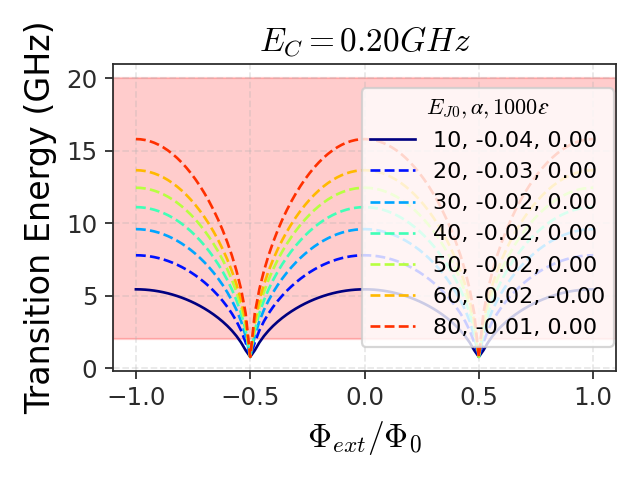

In [6]:
COLORMAP_01 = ["#79cdcd", "#eead0e", "#9a37ff", "#00ee76"]
COLORMAP_12 = plt.get_cmap('jet')

QUBIT_PARAMETERS = {
        "C_gate": fF,
        "C_transmon": fF,
        "jj_squares": 1,
        "number_of_charge_states": 3,
    }
EC = 0.2
EJ0_list = [10, 20, 30, 40, 50, 60, 80]
N_ext_list = [0, 0.5]
NUM_FLUX_POINTS = 101
MID_FLUX_POINT = (NUM_FLUX_POINTS - 1) // 2
flux_ext_list = np.linspace(-1, 1, NUM_FLUX_POINTS)
number_of_levels_to_simulate = 3


fig, ax = plt.subplots(1, 1, figsize=(4, 3), sharex=True)
for (idx, EJ0) in enumerate(EJ0_list):
    transmon_qubit.transmon_qubit_constant_manager.override_parameters(EC, EJ0)
    simulation = transmon_qubit.transmon_qubit_simulator.simulate(
        N_ext_list=N_ext_list, 
        flux_ext_list=flux_ext_list, 
        number_of_levels_to_simulate=number_of_levels_to_simulate, 
        use_sparse_matrix=False)

    # Plot simulation and spectrum
    transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
    transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]

    alpha =  (transition12[MID_FLUX_POINT] - transition01[MID_FLUX_POINT]) / transition01[MID_FLUX_POINT]
    linestyle="-"
    if (abs(alpha) < 0.04):
        linestyle = "--"
    
    Next05 = 1
    Next0 = 0
    charge_dispersion = (simulation["eigvals"][Next05,MID_FLUX_POINT,0] - simulation["eigvals"][Next0,MID_FLUX_POINT,0]) / transition01[MID_FLUX_POINT]
    if (abs(charge_dispersion) > 10**(-3)):
        linestyle = "--"
    
    ax.plot(flux_ext_list, transition01,
               linestyle=linestyle,
               color=COLORMAP_12(idx / len(EJ0_list)),
                label=f"{EJ0}, {alpha:.2f}, {charge_dispersion * 1000:.2f}"
              )
    
ax.set_title(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}GHz$", fontsize=15)
ax.set_ylabel("Transition Energy (GHz)", fontsize=15)
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.legend(loc="center right",
           borderaxespad=0.1,
          title="$E_{J0},α,1000ɛ$",
#           title_fontsize=20,
#           fontsize=20
         )
ax.axhspan(2, 20, color='red', alpha=0.2)
    
plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/selecting-EJ0-to-fall-in-range_EC=1GHz.pdf")
plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/selecting-EJ0-to-fall-in-range_EC=1GHz.png")

# Final qubits

## Artems geometry
- Transmon size = 350$\mu$m
- JJ size $\sim 100 \times 100 \text{nm}^2$

<IPython.core.display.Javascript object>


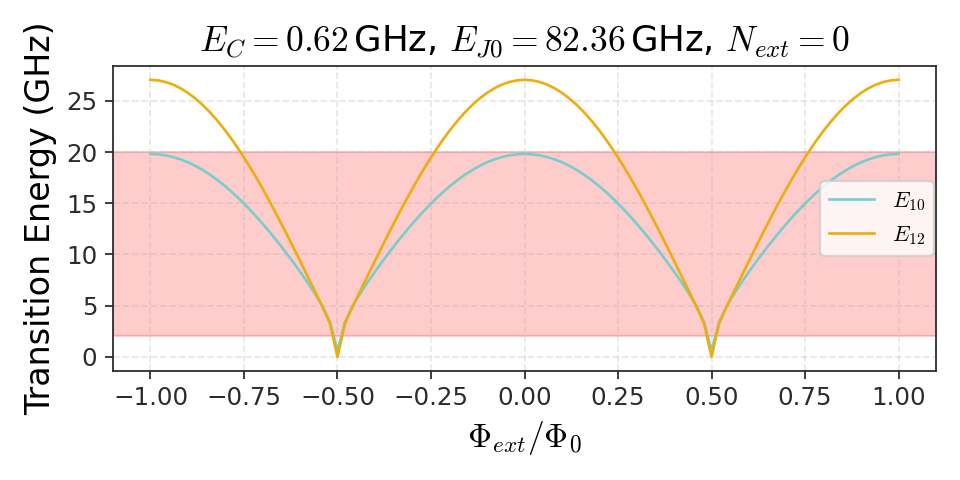

In [11]:

# Geometrical Parameters
# Distances will be in µm
L_gate = 30
C_gate = (L_gate / 10) * fF

L_transmon = 350
S_transmon = 24
C_transmon = (4 * (L_transmon - 2 * S_transmon) / 10) * fF

no_100x100_jj_squares = 1

QUBIT_PARAMETERS = {
        "C_gate": C_gate,
        "C_transmon": C_transmon,
        "jj_squares": no_100x100_jj_squares,
        "number_of_charge_states": 11,
    }

# Simulation parameters
N_ext_list = [0]
flux_ext_list = np.linspace(-1, 1, 101)
use_sparse_matrix = False
number_of_levels_to_simulate = 3

# Simulation
transmon_qubit = QuantumBuilder.build_transmon_qubit(
    QUBIT_PARAMETERS, logging_level=logging.ERROR,
)
simulation = transmon_qubit.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list, 
    flux_ext_list=flux_ext_list, 
    number_of_levels_to_simulate=number_of_levels_to_simulate, 
    use_sparse_matrix=use_sparse_matrix)

# Plot simulation and spectrum
fig, ax = plt.subplots(1, 1, figsize=(6, 3), sharex=True)
transition01 = simulation["eigvals"][0,:,1] - simulation["eigvals"][0,:,0]
transition12 = simulation["eigvals"][0,:,2] - simulation["eigvals"][0,:,1]

ax.plot(flux_ext_list, transition01,
           linestyle="-",
           color=COLORMAP_01[0],
           label="$E_{10}$"
          )
ax.plot(flux_ext_list, transition12,
           linestyle="-",
           color=COLORMAP_01[1],
           label="$E_{12}$"
          )

ax.set_title(f"$E_C={transmon_qubit.transmon_qubit_constant_manager.EC:.2f}\,$GHz, $E_{{J0}}={transmon_qubit.transmon_qubit_constant_manager.EJ0:.2f}\,$GHz, $N_{{ext}}={N_ext_list[0]}$", fontsize=16)
ax.set_ylabel("Transition Energy (GHz)", fontsize=15)
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.legend(loc="center right",
           borderaxespad=0.1)
ax.axhspan(2, 20, color='red', alpha=0.2)

plt.tight_layout()

plt.savefig("./output/2020-09-05_(cooper-pair-box-and-transmon)/final-qubit-design_artem.pdf")